In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda x, pos: f'{x:.0f}k')

plt.rcParams["font.family"] = "Times New Roman"

with open('commute.txt', 'r') as f:
    data = f.readlines()

matrix_arxiv_ori = np.zeros((8, 8))

for line in data:
    if line.startswith('Process'):
        continue
    rank = int(re.search(r'rank (\d)', line).group(1))
    pairs = re.findall(r'\((\d), (\d+)\)', line)
    for pair in pairs:
        other_rank, count = map(int, pair)
        matrix_arxiv_ori[rank][other_rank] = count

matrix_arxiv_ori = matrix_arxiv_ori / 1000

arxiv_vmin = min(matrix_arxiv_ori.min(), matrix_arxiv_ori.min())
arxiv_vmax = max(matrix_arxiv_ori.max(), matrix_arxiv_ori.max())

In [2]:
with open('commute-products.txt', 'r') as f:
    data = f.readlines()

matrix_products_ori = np.zeros((8, 8))

for line in data:
    if line.startswith('Process'):
        continue
    rank = int(re.search(r'rank (\d)', line).group(1))
    pairs = re.findall(r'\((\d), (\d+)\)', line)
    for pair in pairs:
        other_rank, count = map(int, pair)
        matrix_products_ori[rank][other_rank] = count

matrix_products_ori = matrix_products_ori / 1000

products_vmin = min(matrix_products_ori.min(), matrix_products_ori.min())
products_vmax = max(matrix_products_ori.max(), matrix_products_ori.max())

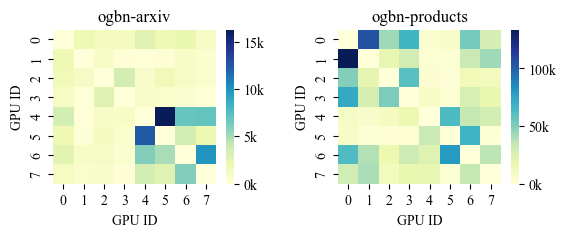

In [3]:
plt.figure(figsize=(6.3, 2), dpi=100)

plt.subplots_adjust(wspace=0.4, hspace=0)

plt.subplot(1, 2, 1)
sns.heatmap(matrix_arxiv_ori, cmap='YlGnBu', cbar_kws={'format': formatter})
plt.title('ogbn-arxiv')
plt.xlabel('GPU ID')
plt.ylabel('GPU ID')

plt.subplot(1, 2, 2)
sns.heatmap(matrix_products_ori, cmap='YlGnBu', cbar_kws={'format': formatter})
plt.title('ogbn-products')
plt.xlabel('GPU ID')
plt.ylabel('GPU ID')

plt.savefig("com-comp.pdf", dpi=400, format="pdf",
            bbox_inches='tight', pad_inches=0.0)